In [1]:
import numpy as np
import scipy as ci
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML

import seaborn as sns 
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

/Users/yang/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

<Figure size 432x288 with 0 Axes>

In [3]:
lifetime = 86400*365 # 1 year! 
fig_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/plots/ana-1-1-' 
data_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/'

In [4]:
f = tables.open_file(data_dir+'data_h5/data_burn_new_Tank.h5','r')
nfile_data = [2831731.134,3081951.304,3158084.037,3155703.188,3082765.564,3550407.43,3186599.156,2706824.349]

# CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
# CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
# CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
# CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
# CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
# CUT_toposplit = f.root.TologicalCounterSplitCount.cols.value[:] == 1

# CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_toposplit
CUT=np.ones_like(f.root.Collection.cols.chi2[:]).astype(bool)

chi2_data_burn = f.root.Collection.cols.chi2[:][CUT]
chi2_red_data_burn = f.root.Collection.cols.chi2_red[:][CUT]
chi2_new_data_burn = f.root.Collection.cols.chi2_new[:][CUT]
chi2_red_new_data_burn = f.root.Collection.cols.chi2_red_new[:][CUT]
PeakOverMedian_data_burn = f.root.Collection.cols.PeakOverMedian[:][CUT]
PeakOverMean_data_burn = f.root.Collection.cols.PeakOverMean[:][CUT]
stoch_data_burn = (chi2_red_data_burn + (np.log10(PeakOverMedian_data_burn)/2))/np.sqrt(2)
stoch_new_data_burn = np.log10(chi2_red_new_data_burn)/8 + np.log10(PeakOverMedian_data_burn)

zenith_data_burn = f.root.SplineMPE.cols.zenith[:][CUT]
truncated_muon_e_data_burn = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
len_dedx_data_burn = f.root.Collection.cols.len_dEdxVector[:][CUT]
cascllh_data_burn = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
NPE_data_burn = f.root.QTot.cols.value[:][CUT]
Qtot_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
N_dom_data_burn = f.root.Balloon.cols.N_Doms[:][CUT]
N_pulses_data_burn = f.root.Balloon.cols.N_Pulses[:][CUT]
balloon_data_burn = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
balloon_adjusted_data_burn = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
in_ice_total_charge_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
in_ice_total_charge_reduced_data_burn = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
ndirdoms_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
ndirpulses_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
topocount_data_burn = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
wimpcount_data_burn = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
cv_ndoms_data_burn = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
cv_npulses_data_burn = f.root.CVMultiplicity.cols.n_pulses[:][CUT]

closest_d_data_burn = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
d_to_IC_center_data_burn = f.root.Dist_to_IC_center.cols.value[:][CUT]
d_to_IT_center_data_burn = f.root.Dist_to_IT_center.cols.value[:][CUT]
Ldir_data_burn = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]

IT_Npulse_data_burn = f.root.IT_veto_double.cols.num_Total_hits[:][CUT]
Npulse_in_window_data_burn = f.root.IT_veto_double.cols.num_correlated_Total_hits_in_window[:][CUT]
Npulse_off_window_data_burn = f.root.IT_veto_double.cols.num_correlated_Total_hits_off_window[:][CUT]

passed_2_data_burn = (f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) # 1 if passed 
vetoed_2_data_burn = (1 - f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) 

rh_2_data_burn = (f.root.IT_veto_double.cols.flag_off_window_2[:][CUT]).astype(bool) # 1 if passed 
rh_2_data_burn = (1 - f.root.IT_veto_double.cols.flag_off_window_2[:][CUT]).astype(bool) 

IT_Npulse_TANK_data_burn = f.root.IT_veto_double_Tank.cols.num_Total_hits[:][CUT]
Npulse_in_window_TANK_data_burn = f.root.IT_veto_double_Tank.cols.num_correlated_Total_hits_in_window[:][CUT]
Npulse_off_window_TANK_data_burn = f.root.IT_veto_double_Tank.cols.num_correlated_Total_hits_off_window[:][CUT]

passed_2_TANK_data_burn = (f.root.IT_veto_double_Tank.cols.flag_window_2[:][CUT]).astype(bool) # 1 if passed 
vetoed_2_TANK_data_burn = (1 - f.root.IT_veto_double_Tank.cols.flag_window_2[:][CUT]).astype(bool) 

rh_2_TANK_data_burn = (f.root.IT_veto_double_Tank.cols.flag_off_window_2[:][CUT]).astype(bool) # 1 if passed 
rh_2_TANK_data_burn = (1 - f.root.IT_veto_double_Tank.cols.flag_off_window_2[:][CUT]).astype(bool) 

runid_data_burn = f.root.I3EventHeader.cols.Run[:][CUT]
eventid_data_burn = f.root.I3EventHeader.cols.Event[:][CUT]


In [5]:
dt_hlc = f.root.IT_veto_vector_delta_t_HLC.cols.item[:]
dt_slc = f.root.IT_veto_vector_delta_t_SLC.cols.item[:]

dt_hlc_Tank = f.root.IT_veto_vector_delta_t_HLC_Tank.cols.item[:]
dt_slc_Tank = f.root.IT_veto_vector_delta_t_SLC_Tank.cols.item[:]

dts = np.concatenate((dt_hlc, dt_slc))
dts_Tank = np.concatenate((dt_hlc_Tank, dt_slc_Tank))

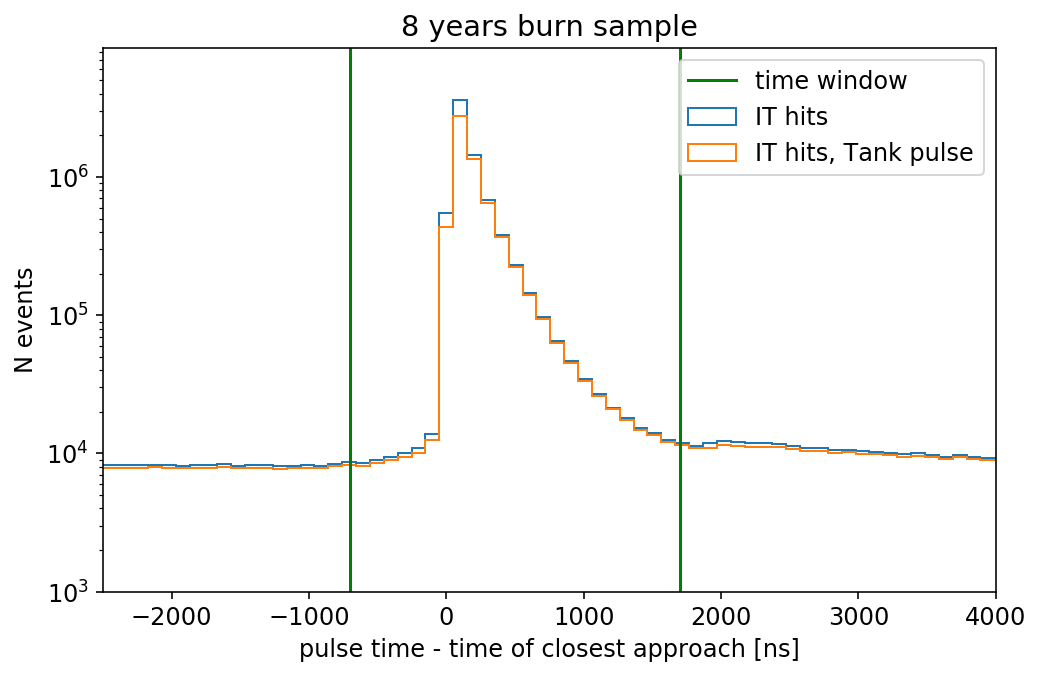

In [6]:
plt.figure(figsize=(8,5))
h,b,_=plt.hist(dts,log=True,bins=np.linspace(-5000,5000,100),histtype='step',label='IT hits')
h_Tank,b_Tank,_=plt.hist(dts_Tank,log=True,bins=np.linspace(-5000,5000,100),histtype='step',label='IT hits, Tank pulse')

plt.axvline(-700,color='green',label='time window')
plt.axvline(1700,color='green')
plt.legend()
plt.xlabel('pulse time - time of closest approach [ns]')
plt.ylabel('N events')
plt.title('8 years burn sample')
plt.xlim(-2500,4000)
plt.ylim(1e3,)
plt.show()

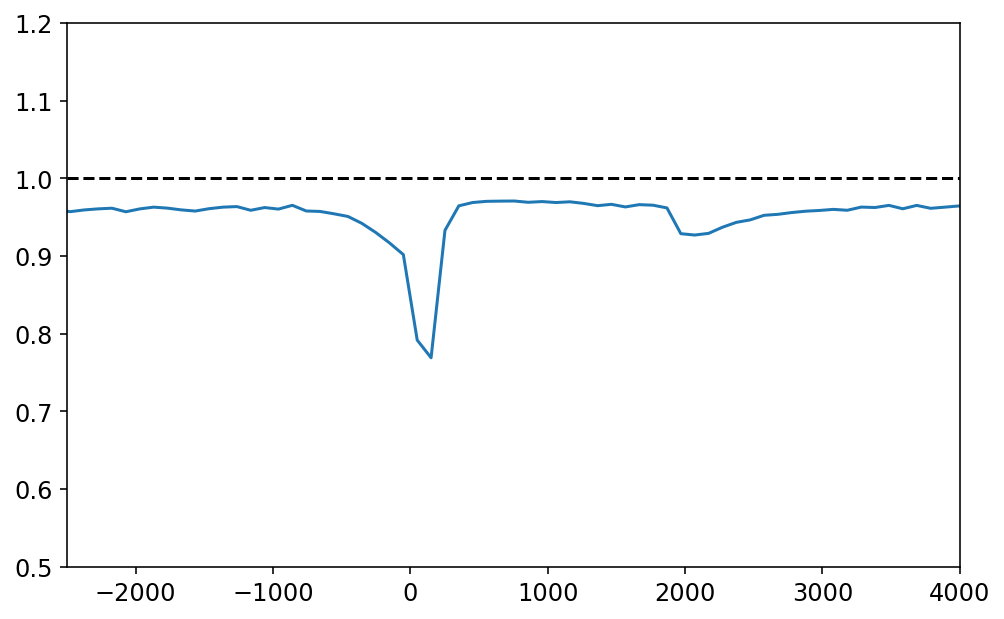

In [7]:
plt.figure(figsize=(8,5))
plt.axhline(1,linestyle='--',color='black')
plt.plot(b[1:], h_Tank/h)
plt.xlim(-2500,4000)
plt.ylim(0.5,1.2)
plt.show()

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


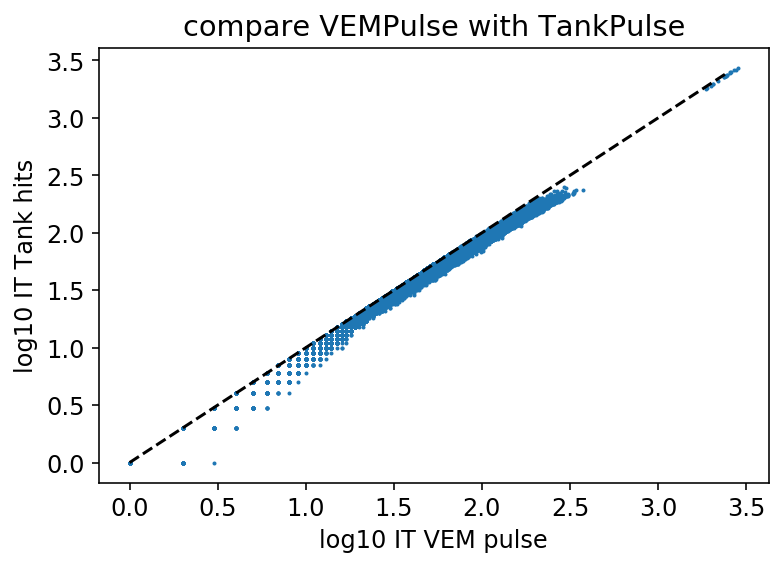

In [8]:
plt.scatter(np.log10(IT_Npulse_data_burn), np.log10(IT_Npulse_TANK_data_burn), s=1)
t = np.arange(0,3.5,0.1)
plt.plot(t,t,'--',color='black')
plt.xlabel('log10 IT VEM pulse')
plt.ylabel('log10 IT Tank hits')
plt.title('compare VEMPulse with TankPulse')
plt.show()

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


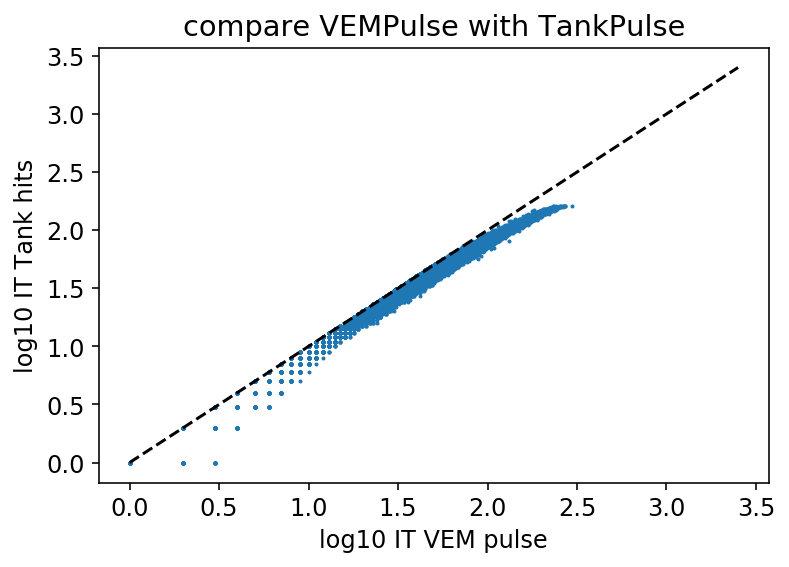

In [9]:
plt.scatter(np.log10(Npulse_in_window_data_burn), np.log10(Npulse_in_window_TANK_data_burn), s=1)
t = np.arange(0,3.5,0.1)
plt.plot(t,t,'--',color='black')
plt.xlabel('log10 IT VEM pulse')
plt.ylabel('log10 IT Tank hits')
plt.title('compare VEMPulse with TankPulse')
plt.show()

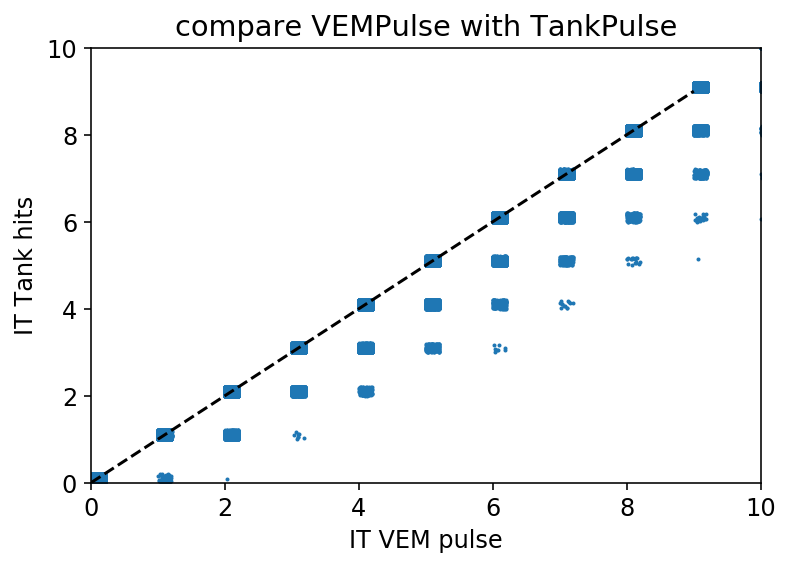

In [10]:
plt.scatter(Npulse_in_window_data_burn+0.2*np.random.rand(len(Npulse_in_window_data_burn)), Npulse_in_window_TANK_data_burn+0.2*np.random.rand(len(Npulse_in_window_TANK_data_burn)), s=1)
t = np.arange(0,10,1)
plt.plot(t,t,'--',color='black')
plt.xlabel('IT VEM pulse')
plt.ylabel('IT Tank hits')
plt.title('compare VEMPulse with TankPulse')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

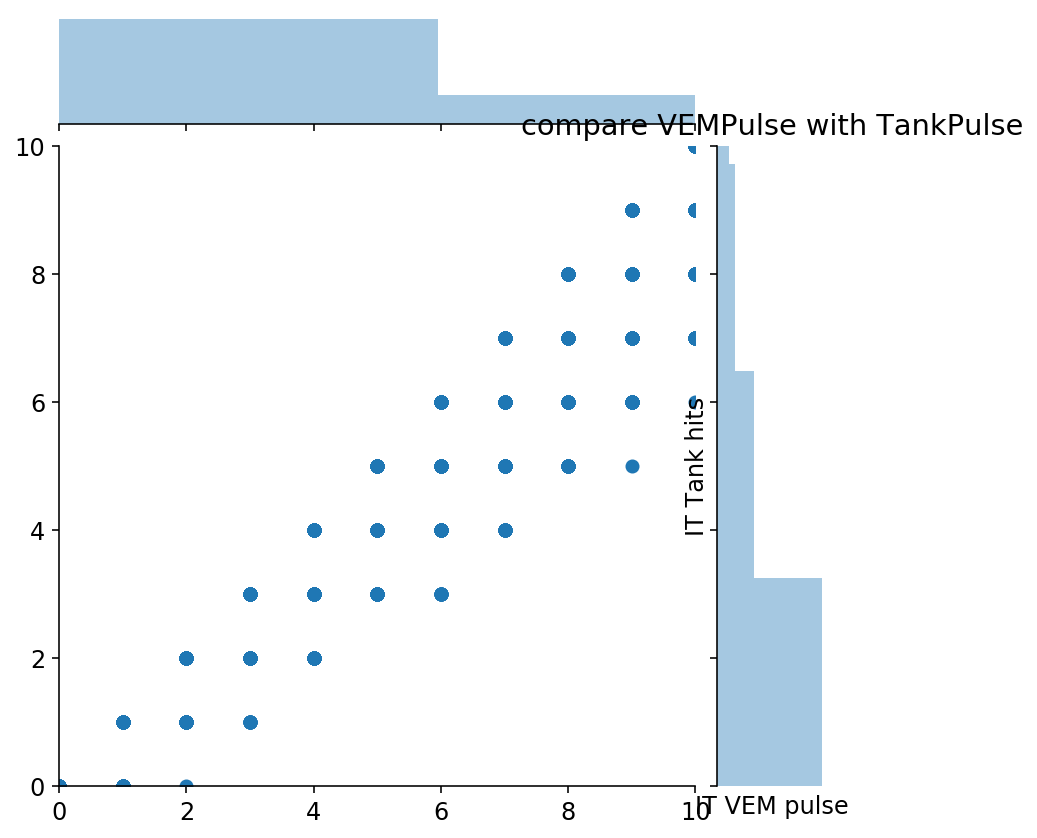

In [11]:
sns.jointplot(x=Npulse_in_window_data_burn, y=Npulse_in_window_TANK_data_burn, kind='scatter',xlim=(0,10),ylim=(0,10))
t = np.arange(0,10,1)
# plt.plot(t,t,'--',color='black')
plt.xlabel('IT VEM pulse')
plt.ylabel('IT Tank hits')
plt.title('compare VEMPulse with TankPulse')
plt.show()

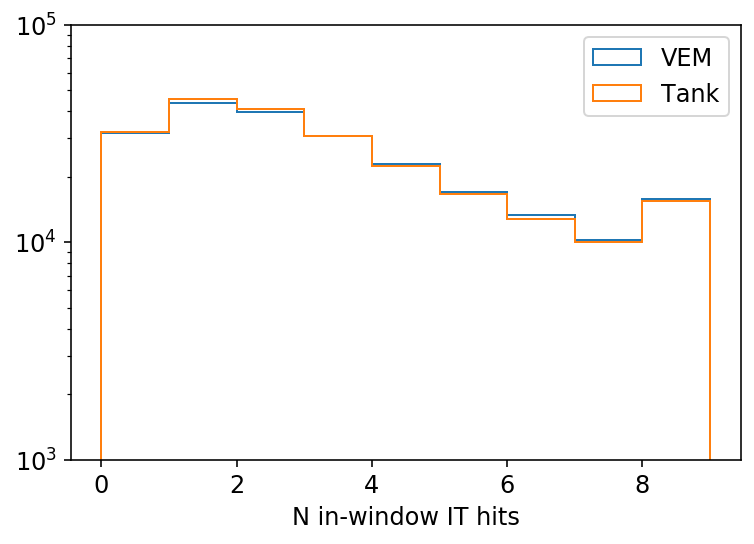

In [13]:
plt.hist(Npulse_in_window_data_burn,bins=np.arange(0,10,1),log=True,histtype='step',label='VEM')
plt.hist(Npulse_in_window_TANK_data_burn,bins=np.arange(0,10,1),log=True,histtype='step',label='Tank')
plt.legend()
plt.xlabel('N in-window IT hits')
plt.ylim(1e3,1e5)
plt.show()

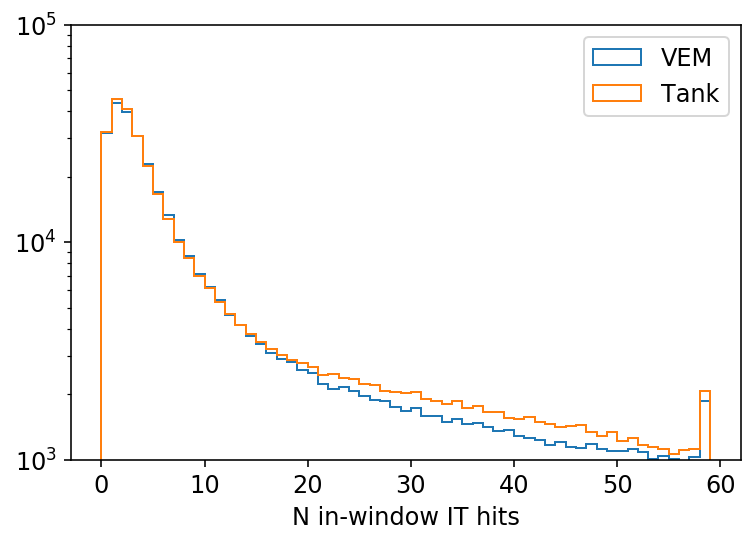

In [15]:
plt.hist(Npulse_in_window_data_burn,bins=np.arange(0,60,1),log=True,histtype='step',label='VEM')
plt.hist(Npulse_in_window_TANK_data_burn,bins=np.arange(0,60,1),log=True,histtype='step',label='Tank')
plt.legend()
plt.xlabel('N in-window IT hits')
plt.ylim(1e3,1e5)
plt.show()